In [ ]:
# Import requirements
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split


In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Build Custom Data

In [5]:
# Build model
HEIGHT=120
WIDTH=160
model = Sequential()

In [6]:
# Using Conv because we don't want to do pixelwise operations. 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(HEIGHT, WIDTH, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
# Converting the generated conv output to row.
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout with a rate of 0.5
model.add(Dense(3, activation='sigmoid'))

In [7]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 158, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 79, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 77, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 36, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 18, 16)       0

# Load all data 

In [8]:
class_names = ["1", "2","non"]

X_total = []
y_train_total = []

# If you have real dataset. You can use. 

# data_dir = "Real_data"
# num_images_per_class = ...
# for class_name in class_names:
#     class_dir = os.path.join(data_dir, class_name)

#     for i in range(num_images_per_class):
#         image_path = os.path.join(class_dir, f"{i}.jpg")
#         img = cv2.imread(image_path)
#         img = cv2.resize(img, (WIDTH, HEIGHT))

#         X_total.append(img)

#         label = class_names.index(class_name)
#         y_train_total.append(label)


# Add synthetic data
data_dir = ""
num_images_per_class = 500
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)

    for i in range(num_images_per_class):
        image_path = os.path.join(class_dir, f"{i}.jpg")
        img = cv2.imread(image_path)
        img = cv2.resize(img, (WIDTH, HEIGHT))

        X_total.append(img)

        label = class_names.index(class_name)
        y_train_total.append(label)


# Add noise and perspective error on synthetic data
data_dir = ""
num_images_per_class = 500
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)

    for i in range(num_images_per_class):
        image_path = os.path.join(class_dir, f"{i}p.jpg")
        img = cv2.imread(image_path)
        img = cv2.resize(img, (WIDTH, HEIGHT))

        X_total.append(img)

        label = class_names.index(class_name)
        y_train_total.append(label)


#one hot vektor
y_total = np.zeros((len(y_train_total), 3))
y_total[np.arange(len(y_train_total)), y_train_total] = 1

# Show and Split data

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

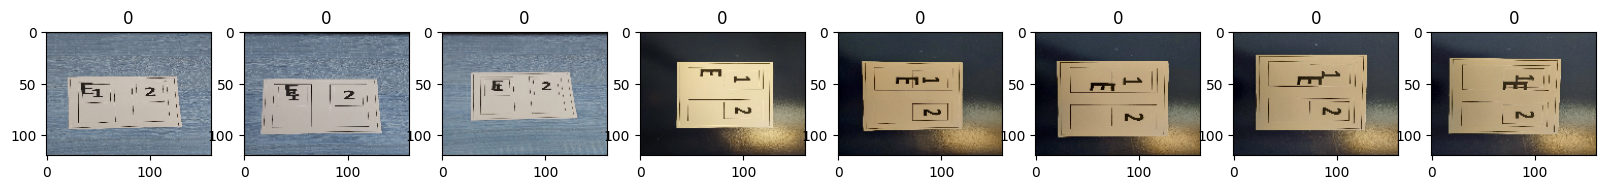

In [9]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx in range(8):
    ax[idx].imshow(X_total[idx+50])
    ax[idx].title.set_text(y_train_total[idx+50])
print(y_train_total)

# Making data suitable for training
X_train, X_val, y_train, y_val = train_test_split(X_total, y_total, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.60, random_state=42)
X_train = np.array(X_train).astype('float32') / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test).astype('float32') / 255.0
X_test = np.array(X_test)
X_val = np.array(X_val).astype('float32') / 255.0
y_val = np.array(y_val)

# Train Model

In [10]:
history = model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val))

Epoch 1/20
307/307 [==============================] - 9s 11ms/step - loss: 0.3926 - accuracy: 0.6922 - val_loss: 0.1912 - val_accuracy: 0.8716
Epoch 2/20
307/307 [==============================] - 2s 8ms/step - loss: 0.1667 - accuracy: 0.8963 - val_loss: 0.1239 - val_accuracy: 0.9223
Epoch 3/20
307/307 [==============================] - 2s 8ms/step - loss: 0.1176 - accuracy: 0.9359 - val_loss: 0.1058 - val_accuracy: 0.9509
Epoch 4/20
307/307 [==============================] - 2s 8ms/step - loss: 0.0883 - accuracy: 0.9543 - val_loss: 0.0854 - val_accuracy: 0.9540
Epoch 5/20
307/307 [==============================] - 3s 8ms/step - loss: 0.0725 - accuracy: 0.9645 - val_loss: 0.0769 - val_accuracy: 0.9588
Epoch 6/20
307/307 [==============================] - 3s 8ms/step - loss: 0.0506 - accuracy: 0.9755 - val_loss: 0.0828 - val_accuracy: 0.9635
Epoch 7/20
307/307 [==============================] - 3s 8ms/step - loss: 0.0385 - accuracy: 0.9800 - val_loss: 0.0833 - val_accuracy: 0.9525
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


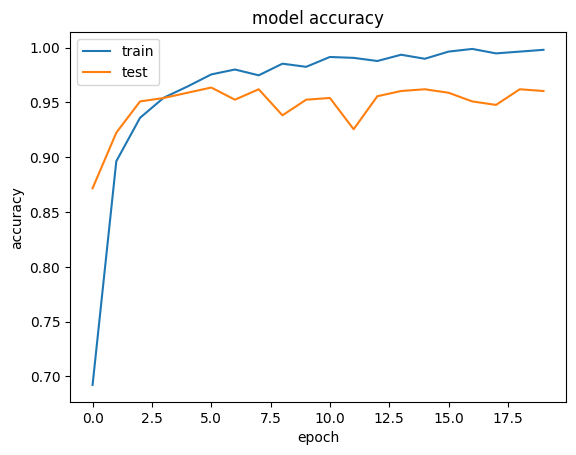

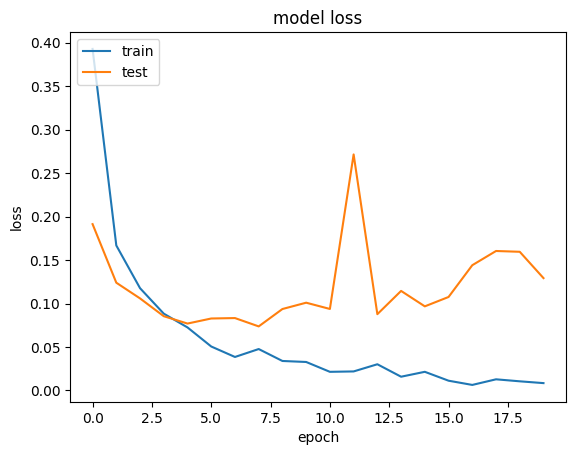

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test Model

In [12]:
# Test model 
sonuc=model.predict(X_test)

max_indices = np.argmax(sonuc, axis=1)
result_array = np.zeros_like(sonuc)
result_array[np.arange(X_test.shape[0]), max_indices] = 1

14/14 [==============================] - 2s 13ms/step


Sonuc

In [13]:
#Daha önce görmediği verilerle test etmek
from sklearn import metrics
#from sklearn.metrics import accuracy_score, classification_report
accuracy = metrics.accuracy_score(result_array, y_test);
print("Accuracy Test")
print(accuracy);

print(metrics.classification_report(y_test, result_array))

Accuracy Test
0.9619047619047619
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.95      0.97      0.96       142
           2       0.94      0.95      0.94       133

   micro avg       0.96      0.96      0.96       420
   macro avg       0.96      0.96      0.96       420
weighted avg       0.96      0.96      0.96       420
 samples avg       0.96      0.96      0.96       420



# Save Model 

In [16]:
model.save('Ballot_pred.h5')

# Predict Images

Load model to predict images

In [ ]:
from tensorflow.keras.models import load_model
pusula_model = load_model('Ballot_pred.h5')

In [ ]:
image_test_path =""# resmin ismini girin
img = cv2.imread(image_test_path)
img = cv2.resize(img, (WIDTH, HEIGHT))
img=np.array(img).astype('float32') / 255.0

In [ ]:
sonuc=pusula_model.predict(X_total)
max_indices = np.argmax(sonuc, axis=1)
result_array = np.zeros_like(sonuc)
result_array[np.arange(X_total.shape[0]), max_indices] = 1

result_array